Load Glutamatergic Data

In [1]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "E:/Mouse_M1/"

adata = sc.read_h5ad(data_path + "Mouse_M1_GABA.h5ad")
adata

AnnData object with n_obs × n_vars = 15793 × 31053
    obs: 'class_label', 'cluster_label', 'batch', 'n_counts', 'leiden', 'class'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'

In [2]:
adata.X = adata.raw.X

Analyze Glutamatergic Cells

In [3]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


2023-06-09 13:49:31,521 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-06-09 13:49:36,100 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-06-09 13:49:36,257 - harmonypy - INFO - Iteration 1 of 20
2023-06-09 13:49:43,762 - harmonypy - INFO - Iteration 2 of 20
2023-06-09 13:49:51,036 - harmonypy - INFO - Iteration 3 of 20
2023-06-09 13:49:58,314 - harmonypy - INFO - Iteration 4 of 20
2023-06-09 13:50:05,584 - harmonypy - INFO - Iteration 5 of 20
2023-06-09 13:50:10,746 - harmonypy - INFO - Iteration 6 of 20
2023-06-09 13:50:14,357 - harmonypy - INFO - Iteration 7 of 20
2023-06-09 13:50:17,709 - harmonypy - INFO - Iteration 8 of 20
2023-06-09 13:50:21,059 - harmonypy - INFO - Iteration 9 of 20
2023-06-09 13:50:24,738 - harmonypy - INFO - Iteration 10 of 20
2023-06-09 13:50:28,077 - harmonypy - INFO - Iteration 11 of 20
2023-06-09 13:50:31,388 - harmonypy - INFO - Iteration 12 of 20
2023-06-09 13:50:35,133 - harmonypy - INFO - Iteration 13 of

computing neighbors


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:41)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


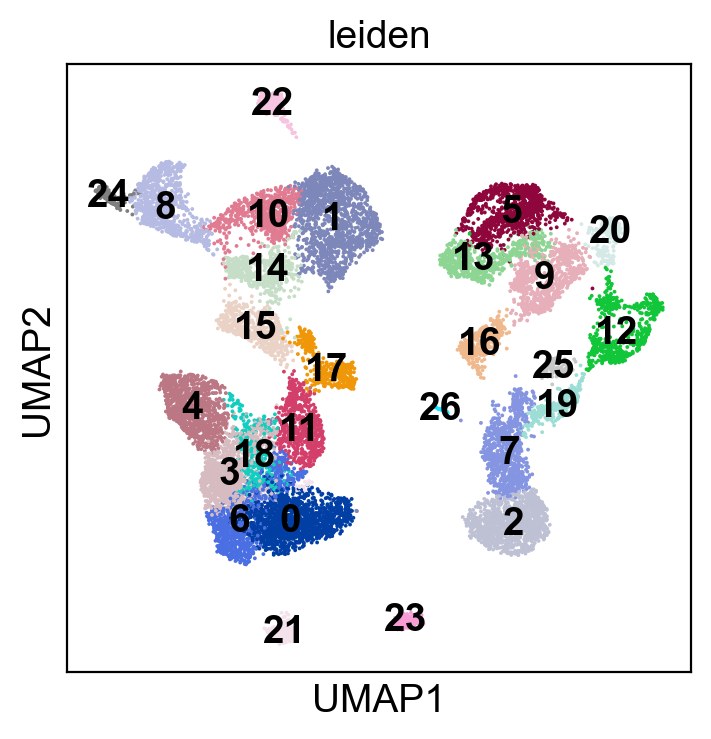

In [4]:
sc.tl.pca(adata, svd_solver="arpack")
sce.pp.harmony_integrate(adata, "batch", max_iter_harmony=20, random_state=66)
sc.pp.neighbors(adata, n_neighbors=25, use_rep="X_pca_harmony")
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


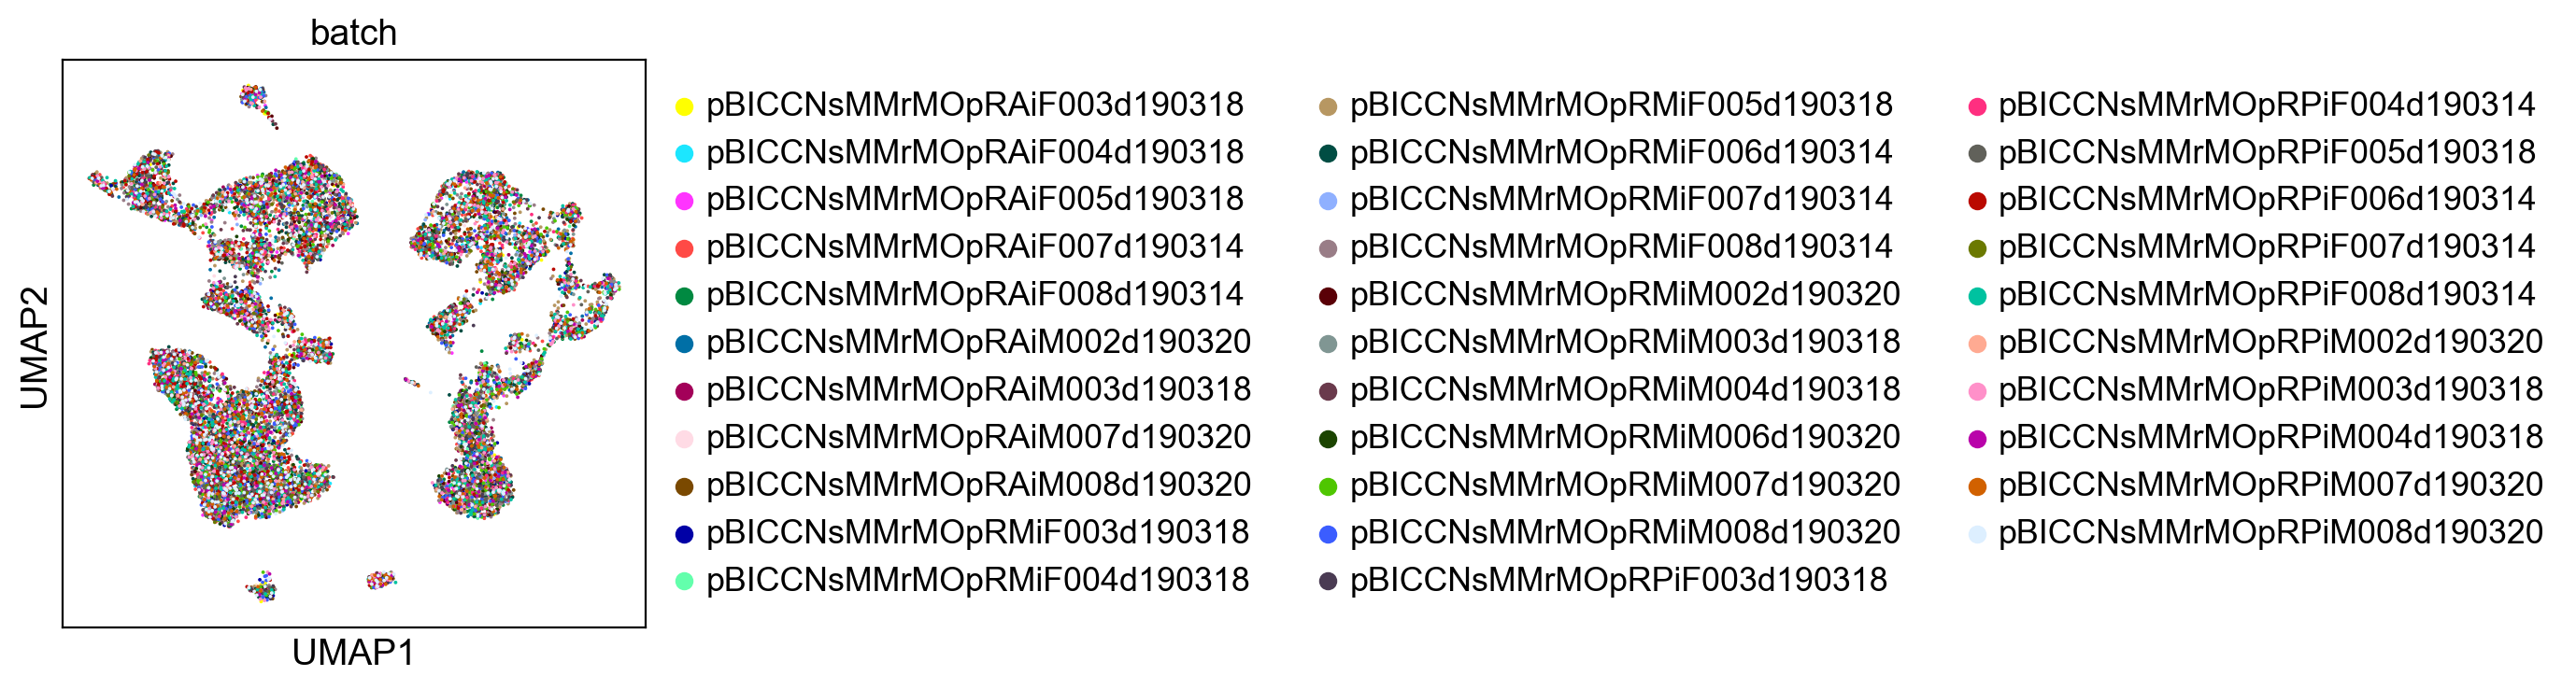

In [5]:
sc.pl.umap(adata, color=["batch"])

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


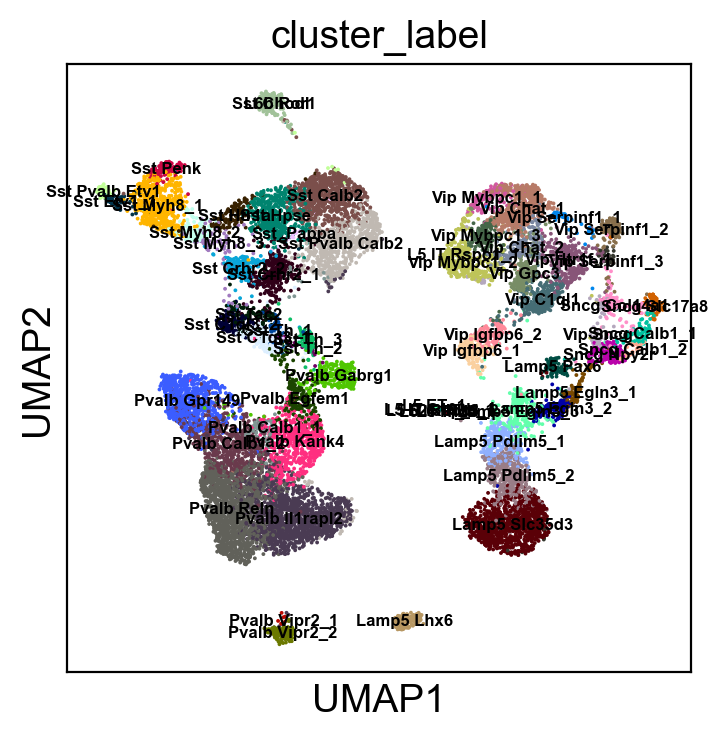

In [6]:
sc.pl.umap(adata, color=["cluster_label"], legend_loc="on data", legend_fontsize=6)

In [1]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "E:/Mouse_M1/"

adata = sc.read_h5ad(data_path + "Mouse_M1_GABA_Clustered.h5ad")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


C:\Ryan\GitHub\scanpy\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


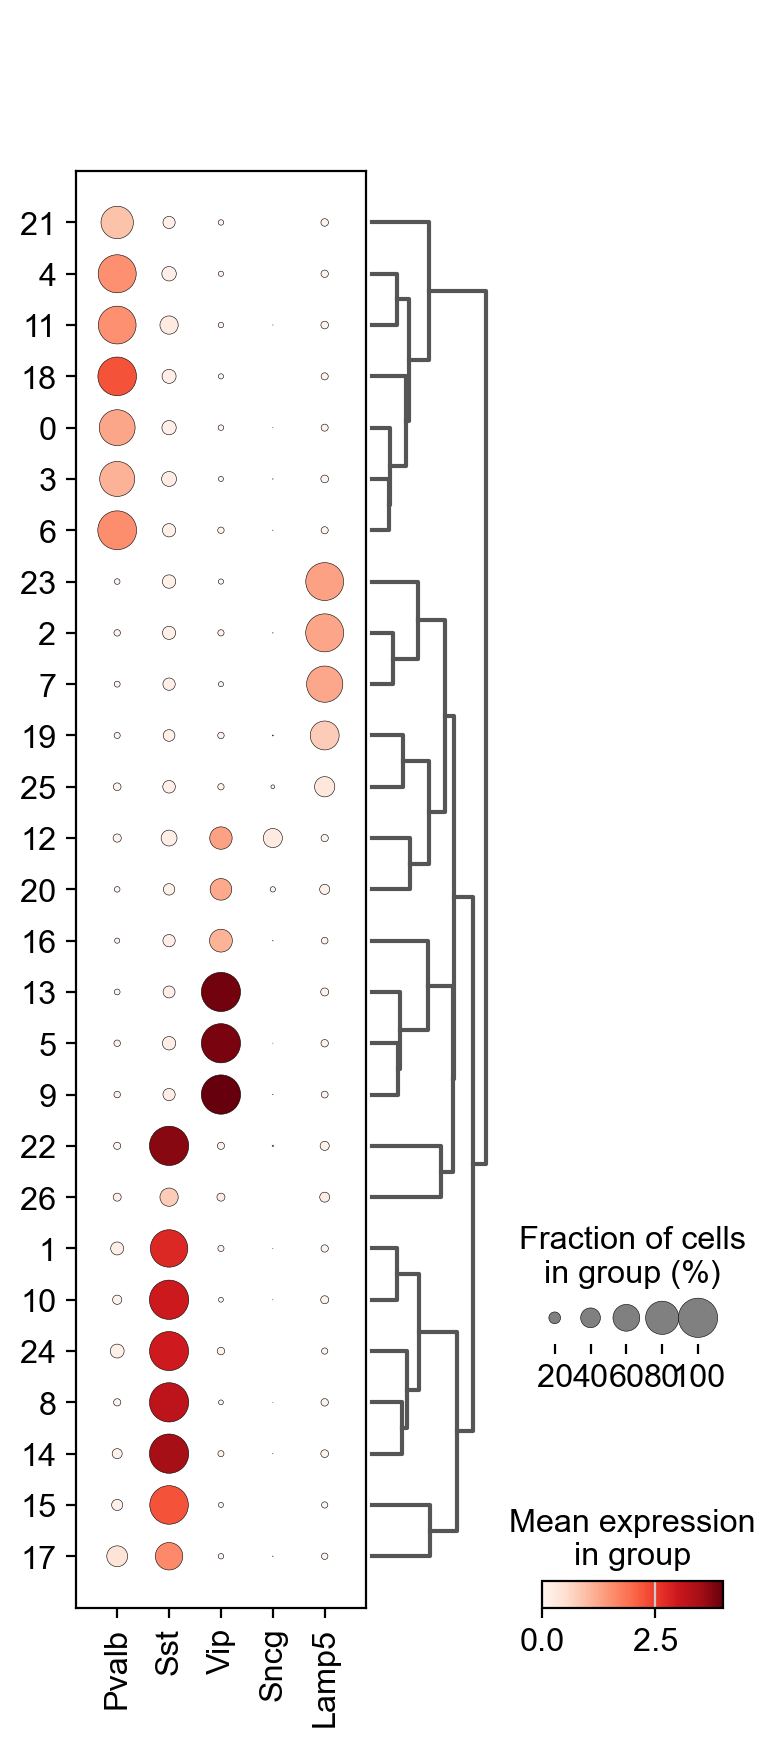

In [2]:
GABAergic_markers = [
                         "Pvalb", 
                         "Sst", 
                         "Vip", 
                         "Sncg", 
                         "Lamp5", 
                        ]

sc.pl.dotplot(
    adata, 
    GABAergic_markers, 
    groupby="leiden", 
    dendrogram=True, 
    vmin=0, vmax=4, 
    var_group_rotation=0, 
            )

Save Clustered AnnData Object

In [7]:
adata.write_h5ad(data_path + "Mouse_M1_GABA_Clustered.h5ad")